In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.11388,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.10066
1,NaN,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.84450
2,-1.11540,0.217560,1.61050,1.33710,3.76820,NaN,3.99630,2.21730,3.90290,1.51440,2.43890,0.63358
3,-0.53916,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.73460
4,-0.26840,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.94706
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.86710,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.85140
396,0.26463,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,NaN,0.12790,0.54249,3.36580,3.75560
397,-3.47910,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.12380
398,7.29300,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	13
float64		column 2	0
float64		column 3	6
float64		column 4	18
float64		column 5	24
float64		column 6	24
float64		column 7	24
float64		column 8	13
float64		column 9	24
float64		column 10	18
float64		column 11	24
float64		column 12	31


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,387.000000,400.000000,394.000000,382.000000,376.000000,376.000000,376.000000,387.000000,376.000000,382.000000,376.000000,369.000000
mean,-0.149074,0.061568,2.056423,1.922128,1.951791,1.991086,2.027359,1.980614,1.980641,2.028381,1.972762,1.956851
std,2.560511,2.768366,1.128753,1.140771,1.160407,1.140991,1.146272,1.133241,1.136110,1.148585,1.147003,1.161842
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.720125,-0.828385,1.131800,0.985088,0.904942,1.045725,1.030075,1.045150,1.083725,1.048175,0.943813,0.970820
50%,-0.089585,0.015595,2.098450,1.822600,1.947800,2.038750,2.098100,1.975400,2.100050,2.082700,1.904550,1.926100
75%,0.716405,0.892328,3.008700,2.852700,2.964400,2.966250,2.958150,2.984800,2.910950,3.035450,2.967075,2.946100
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

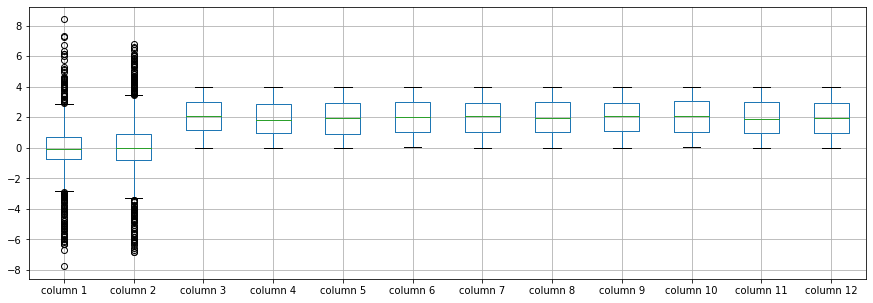

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.149074
column 2     0.061568
column 3     2.056423
column 4     1.922128
column 5     1.951791
column 6     1.991086
column 7     2.027359
column 8     1.980614
column 9     1.980641
column 10    2.028381
column 11    1.972762
column 12    1.956851
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.008279,-0.035886,-0.074014,0.013484,0.025863,-0.036485,0.043994,-0.019571,0.056714,0.083682,0.007116
column 2,0.008279,1.000000,-0.037324,0.039478,-0.083931,-0.069213,0.031282,-0.016410,-0.041138,0.019958,-0.032620,0.068819
column 3,-0.035886,-0.037324,1.000000,0.004016,-0.032391,-0.076504,-0.071568,0.090112,0.110264,-0.019523,-0.089525,0.018275
column 4,-0.074014,0.039478,0.004016,1.000000,-0.014252,0.096958,0.020418,0.099487,-0.022504,0.063564,0.000493,-0.036934
column 5,0.013484,-0.083931,-0.032391,-0.014252,1.000000,0.068994,0.039069,0.004007,-0.024973,0.043220,-0.004431,-0.045689
column 6,0.025863,-0.069213,-0.076504,0.096958,0.068994,1.000000,0.007066,0.032882,0.019831,-0.007775,0.001056,-0.019795
column 7,-0.036485,0.031282,-0.071568,0.020418,0.039069,0.007066,1.000000,-0.003265,0.062051,0.038517,-0.032813,-0.032203
column 8,0.043994,-0.016410,0.090112,0.099487,0.004007,0.032882,-0.003265,1.000000,0.095132,-0.126504,-0.047064,-0.025851
column 9,-0.019571,-0.041138,0.110264,-0.022504,-0.024973,0.019831,0.062051,0.095132,1.000000,0.010594,-0.002651,0.058824
column 10,0.056714,0.019958,-0.019523,0.063564,0.043220,-0.007775,0.038517,-0.126504,0.010594,1.000000,0.023530,0.021705


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+55,12+55+55,12+55+55+55,12+55+55+55+55,12+55+55+55+55+55,12+55+55+55+55+55+55,12+55+55+55+55+55+55+55,12+55+55+55+55+55+55,12+55+55+55+55+55,12+55+55+55+55,12+55+55+55,12+55+55,12+55,12], vae_layer = False, seed = 55)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.693316192626952
Epoch: 1 , loss: 26.60935386657715
Epoch: 2 , loss: 26.413303604125975
Epoch: 3 , loss: 25.113884963989257
Epoch: 4 , loss: 22.12589637756348
Epoch: 5 , loss: 21.637219772338867
Epoch: 6 , loss: 21.498029708862305
Epoch: 7 , loss: 21.243060913085937
Epoch: 8 , loss: 20.663484191894533
Epoch: 9 , loss: 20.775255279541014
Epoch: 10 , loss: 20.79739860534668
Epoch: 11 , loss: 20.61231658935547
Epoch: 12 , loss: 20.26233024597168
Epoch: 13 , loss: 20.266764831542968
Epoch: 14 , loss: 20.090855712890626
Epoch: 15 , loss: 20.1835343170166
Epoch: 16 , loss: 20.076810836791992
Epoch: 17 , loss: 19.709235916137697
Epoch: 18 , loss: 19.355996017456054
Epoch: 19 , loss: 19.621299591064453
Epoch: 20 , loss: 19.250039978027345
Epoch: 21 , loss: 19.021836166381835
Epoch: 22 , loss: 19.05384033203125
Epoch: 23 , loss: 19.168874282836914
Epoch: 24 , loss: 19.102520294189453
Epoch: 25 , loss: 19.2362

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,-0.143682,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,-0.030134,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
396,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,-2.010317,0.000000,0.0,0.0,0.000000
397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
398,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.676339


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(23.5742770084821, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.14438434086166027

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    0.660082
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.469600,0.21541,3.090000,0.783430,0.51035,0.03043,0.100660
1,-0.114293,0.206580,0.48861,1.43430,3.12990,1.277800,1.42850,0.143330,1.194800,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.179866,3.99630,2.217300,3.902900,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.567160,1.66010,2.352700,0.661260,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.377400,1.52260,0.984750,3.109400,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.354060,1.62780,3.294000,1.085000,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.686100,1.09510,1.783283,0.127900,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.470100,0.92540,1.841100,3.477300,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.410100,2.95160,0.278000,0.990590,3.43740,1.81620,1.763551


In [20]:
imputations[-1].to_excel("Difdoug_NG_5(imp).xlsx", index=False, header=False)